In [1]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd

In [2]:
PTT_HOME_URL = "https://www.ptt.cc/bbs/index.html"

PTT_HOME_O_HTML = requests.get(PTT_HOME_URL)

PTT_HOME_M_HTML = BeautifulSoup(PTT_HOME_O_HTML.text,"lxml")

urls = PTT_HOME_M_HTML.find_all("a",class_="board")

PTT_HOME_URL = PTT_HOME_URL[0:-15]

In [3]:
author = []
title = []
url = []
rec = []
date = []

In [7]:
for i in range(0,6):
    time.sleep(1)
    
    try:
        New_Page_O_HTML = requests.get(PTT_HOME_URL+urls[i]["href"])
        New_Page_M_HTML = BeautifulSoup(New_Page_O_HTML.text,"lxml")
        post_urls = New_Page_M_HTML.find_all("div",class_="title")
    except:
        continue
    
    for j in range(0,6):
        
        try:
            post_url = post_urls[j]
            u = post_url.find("a")
        
            try:
                url.append(u["href"])
            except:
                url.append(np.nan)
            
            try:
                title.append(u.text)
            except:
                title.append(np.nan)
        except:
            continue
            
    post_rec = New_Page_M_HTML.find_all("div",class_="nrec")
    
    for l in range(0,6):
        try:
            recc = post_rec[l]
            r = recc.find("span")
        
            try:
                rec.append(r.text)
            except:
                rec.append(np.nan)
        except:
            continue
            
    post_author = New_Page_M_HTML.find_all("div",class_="author")
    
    for p in range(0,6):
        try:
            authorr = post_author[p]
        
            try:
                author.append(authorr.text)
            except:
                author.append(np.nan)
        except:
            continue
            
    post_date = New_Page_M_HTML.find_all("div",class_="date")
    
    for h in range(0,6):
        try:
            datee = post_date[h]
            try:
                date.append(datee.text)
            except:
                date.append(np.nan)
        except:
            continue

In [8]:
PTT_DICT = {"Author":author,
            "Title":title,
            "URL":url,
            "Rec":rec,
            "Date":date}

In [9]:
PTT_DF = pd.DataFrame(PTT_DICT)
PTT_DF

,Author,Title,URL,Rec,Date
0,visit19xx,[新聞] 混血兒八村壘 選秀首輪行情,/bbs/NBA/M.1545397499.A.63A.html,52,12/21
1,-,NaN,NaN,44,12/21
2,adam7148,[情報] Doncic談NBA：球場更寬速度更快，但籃球,/bbs/NBA/M.1545399289.A.0C7.html,34,12/21
3,QoGIVoQ,[情報] Chandler：Walton幹得很棒，他把握了執教,/bbs/NBA/M.1545400131.A.B2C.html,30,12/21
4,leo921080931,[新聞] 被交易會洩氣 林書豪自勉：只需要好機會,/bbs/NBA/M.1545402507.A.223.html,18,12/21
5,suyei,[新聞] 林書豪接受專訪 再回林來瘋發跡地心情,/bbs/NBA/M.1545403460.A.E1F.html,7,12/21
6,dodomilk,[18秋] 魔法禁書目錄III 12 蘿拉阿嬤萌萌,/bbs/C_Chat/M.1545416235.A.62C.html,15,12/22
7,finzaghi,[閒聊] 今天是楠木ともり的生日,/bbs/C_Chat/M.1545416667.A.80E.html,7,12/22
8,OlaOlaOlaOla,Re: [問題] 大家是怎麼管理自己的電子書的?,/bbs/C_Chat/M.1545416876.A.AE0.html,5,12/22
9,Shichimiya,[18秋] JOJO黃金之風 12,/bbs/C_Chat/M.1545418156.A.E52.html,23,12/22


In [10]:
import matplotlib.pyplot as plt

In [25]:
for i in range(0,len(PTT_DF.index)):
    n = PTT_DF.Rec[i]
    if(type(n)==str):
        if(n=="爆"):
            PTT_DF.Rec[i]=30
        else:
            PTT_DF.Rec[i]=float(n)

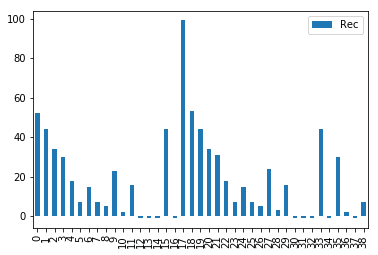

In [30]:
PTT_DF['Rec'] = PTT_DF['Rec'].fillna(-1)
PTT_DF.plot(kind='bar')